In [1]:
from datetime import date
import os

import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
import plotly.express as px
import re
import seaborn as sns
from shapely.geometry import Point, Polygon
from shapely.geometry import MultiPolygon

from geodatasets import get_path
import rioxarray
from geocube.vector import vectorize

In [2]:
df_pop = pd.read_excel('./GHS_POP_GLOBE_R2023A_input_metadata.xlsx', sheet_name=2, header=2)

In [3]:
df_pop.head()

,Country,Continent,ISOAlpha,ISONum,Populated,Admin1,Admin2,Admin3,Admin4,Admin5,...,average Populated Area km2,SD Populated Area km2,Population weighted AVGArea km2,PopSource Type,PopEstim/ProjType,Source.1,GrowthRateLevel,GrowthRateStart,GrowthRateEnd,WUP boundaries estimate admin level
0,Afghanistan,Asia,AFG,4.0,YES,Province,District,NaN,NaN,NaN,...,1613.590752,2212.12236,1498.372138,Population Estimate/Projection,UN Urban and Rural Population by Age and Sex (...,"Central Statistics Organization Afghanistan, P...",1.0,1998.0,2011.0,2.0
1,Åland Islands,Europe,ALA,248.0,YES,Municipality,NaN,NaN,NaN,NaN,...,91.210887,43.083888,77.835726,Population Register,not applicable,"Statistics Aland, 2010 Population Register, Ta...",1.0,2000.0,2010.0,2.0
2,Albania,Europe,ALB,8.0,YES,16 County,District,377 Municipality,NaN,NaN,...,76.237427,54.948308,51.699086,Final Census,not applicable,"Thomas Brinkhoff: City Population, http://www....",3.0,2001.0,2011.0,3.0
3,Algeria,Africa,DZA,12.0,YES,Province,Commune,NaN,NaN,NaN,...,1504.3249,8718.061847,1130.599015,Final Census,not applicable,"Office National des Statistiques, RPGH 2008, T...",2.0,1998.0,2008.0,2.0
4,American Samoa,Oceania,ASM,16.0,YES,District,County,Village,NaN,NaN,...,2.918525,3.763098,4.055584,Final Census,not applicable,"United States Census Bureau, Census 2010, Tabl...",3.0,2000.0,2010.0,2.0


In [4]:
df = pd.read_excel('GIS_data_code.xlsx', sheet_name=1, header=0)
df = df.rename(columns={'Longitude (degrees)' : 'Longitude',
                   'Latitude (degrees)' : 'Latitude'})

In [5]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs='epsg:4326')

gdf.head()

,Property Name,Property ID,State/Province,Country Name,SNL Global Region,Latitude,Longitude,Population density in a 10km radius -Mean,Population density in a 20km radius -Mean,Population density in a 100km radius -Mean,...,Arid climate,Tropical rainforest climate,Polar climate,Croplands in 10km radius - Mean,Croplands in 20km radius - Mean,Croplands in 100km radius - Mean,Pasture land in a 10 km radius - Mean,Pasture land in a 10 km radius - Mean.1,Pasture land in a 10 km radius - Mean.2,geometry
0,101,64665,Santa Catarina,Brazil,Latin America and Caribbean,-28.73240,-49.24552,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-49.24552 -28.73240)
1,11 RAU-Novaya,68289,Luhans'ka Oblast',Ukraine,Europe,48.51954,38.65827,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (38.65827 48.51954)
2,1165L,63154,Tete,Mozambique,Africa,-16.23000,34.00000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (34.00000 -16.23000)
3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.48279,-58.83353,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-58.83353 -11.48279)
4,12 Mile Creek,66178,Queensland,Australia,Asia-Pacific,-23.16300,149.08300,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (149.08300 -23.16300)


In [6]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/3m/s0ysqyzs3fb_mcgvm4wjzt3w0000gn/T/ipykernel_23378/3256958817.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
/var/folders/3m/s0ysqyzs3fb_mcgvm4wjzt3w0000gn/T/ipykernel_23378/3256958817.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


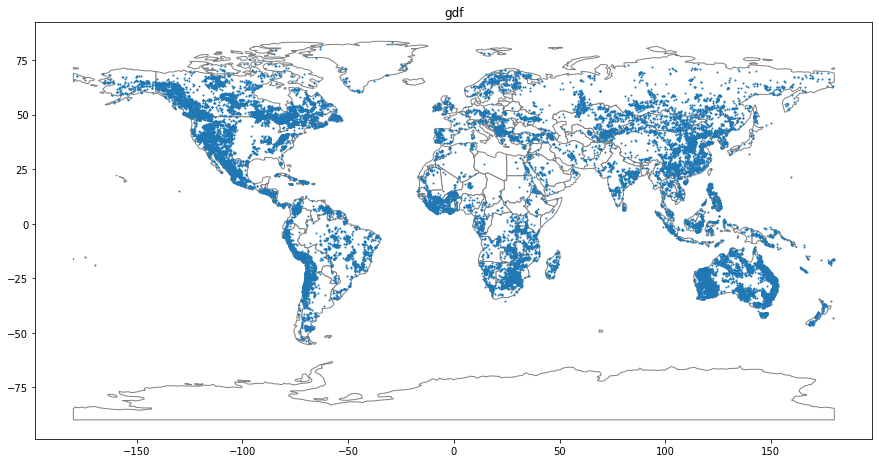

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

world.plot(ax=ax, color='white', edgecolor='gray')

# Display the image with the custom colormap
#ax = gdf.plot(column='geometry', s=1)
g = gdf.plot(markersize=1, legend=True, ax=ax)
g.set_title('gdf')

plt.show()

In [8]:
#merged_pop = pd.merge(df_pop, world, left_on='Country', right_on='name', how='left')
#merged_pop

In [9]:
tif_path = "./GHS_POP_E2015_GLOBE_R2023A_54009_1000_V1_0.tif"

'''with rasterio.open(tif_path) as src:
    metadata = src.meta

    raster_data= src.read(1)
'''

df_pop_tif = rioxarray.open_rasterio(tif_path).squeeze()
df_pop_tif.name = "population"

df_pop_tif

<xarray.DataArray 'population' (y: 18000, x: 36082)>
[649476000 values with dtype=float64]
Coordinates:
    band         int64 1
  * x            (x) float64 -1.804e+07 -1.804e+07 ... 1.804e+07 1.804e+07
  * y            (y) float64 9e+06 8.998e+06 8.998e+06 ... -8.998e+06 -9e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        324987.21483612
    STATISTICS_MEAN:           53.784310443316
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         645.84781146203
    STATISTICS_VALID_PERCENT:  21.26
    _FillValue:                -200.0
    scale_factor:              1.0
    add_offset:                0.0

In [10]:
df_pop_tif2 = df_pop_tif.astype('float32')

In [11]:
df_pop_tif2

<xarray.DataArray 'population' (y: 18000, x: 36082)>
array([[-200., -200., -200., ..., -200., -200., -200.],
       [-200., -200., -200., ..., -200., -200., -200.],
       [-200., -200., -200., ..., -200., -200., -200.],
       ...,
       [-200., -200., -200., ..., -200., -200., -200.],
       [-200., -200., -200., ..., -200., -200., -200.],
       [-200., -200., -200., ..., -200., -200., -200.]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 -1.804e+07 -1.804e+07 ... 1.804e+07 1.804e+07
  * y            (y) float64 9e+06 8.998e+06 8.998e+06 ... -8.998e+06 -9e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        324987.21483612
    STATISTICS_MEAN:           53.784310443316
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         645.84781146203
    STATISTICS_VALID_PERCENT:  21.26
    _FillValue:                -200.0
    scale_factor:              1.0
    add_offset:                0.0

In [12]:
gdf_pop = vectorize(df_pop_tif2)

In [13]:
gdf_pop

,population,geometry
0,0.000000e+00,"POLYGON ((-1895000.000 8724000.000, -1895000.0..."
1,7.604600e-07,"POLYGON ((-1907000.000 8723000.000, -1907000.0..."
2,5.133105e-06,"POLYGON ((-1906000.000 8723000.000, -1906000.0..."
3,9.505749e-06,"POLYGON ((-1905000.000 8723000.000, -1905000.0..."
4,1.201337e-05,"POLYGON ((-1904000.000 8723000.000, -1904000.0..."
...,...,...
30988345,4.490707e+00,"POLYGON ((-4699000.000 -6473000.000, -4699000...."
30988346,5.838234e-01,"POLYGON ((-4695000.000 -6474000.000, -4695000...."
30988347,2.108076e+00,"POLYGON ((-4718000.000 -6475000.000, -4718000...."
30988348,3.944753e-01,"POLYGON ((-4694000.000 -6475000.000, -4694000...."


In [16]:
len(gdf_pop['population'].unique())

24232294

In [17]:
gdf_population = gdf_pop.groupby('population')['geometry'].apply(lambda x: x.unary_union)

In [ ]:
buffer_radius = 10
buffer_gdf = gdf.copy()
buffer_gdf = buffer_gdf.to_crs('EPSG:3857')
buffer_gdf['geometry'] = buffer_gdf.buffer(buffer_radius*1000)
buffer_gdf['geometry_20'] = buffer_gdf.buffer(20*1000)
buffer_gdf['geometry_100'] = buffer_gdf.buffer(100*1000)

In [ ]:
buffer_gdf

,Property Name,Property ID,State/Province,Country Name,SNL Global Region,Latitude,Longitude,Population density in a 10km radius -Mean,Population density in a 20km radius -Mean,Population density in a 100km radius -Mean,...,Arid climate,Tropical rainforest climate,Polar climate,Croplands in 10km radius - Mean,Croplands in 20km radius - Mean,Croplands in 100km radius - Mean,Pasture land in a 10 km radius - Mean,Pasture land in a 10 km radius - Mean.1,Pasture land in a 10 km radius - Mean.2,geometry
0,101,64665,Santa Catarina,Brazil,Latin America and Caribbean,-28.732400,-49.245520,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-5471986.210 -3341630.440, -5472034...."
1,11 RAU-Novaya,68289,Luhans'ka Oblast',Ukraine,Europe,48.519540,38.658270,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((4313418.931 6193727.142, 4313370.779..."
2,1165L,63154,Tete,Mozambique,Africa,-16.230000,34.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((3794862.687 -1831373.468, 3794814.53..."
3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.482790,-58.833530,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-6539318.601 -1286902.183, -6539366...."
4,12 Mile Creek,66178,Queensland,Australia,Asia-Pacific,-23.163000,149.083000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((16605843.646 -2651742.668, 16605795...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34264,Zymo,38983,British Columbia,Canada,United States and Canada,54.831119,-128.058003,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-14245351.686 7329158.500, -14245399..."
34265,Zyrianovsk Complex,28934,Shyghys Qazaqstan oblysy,Kazakhstan,Europe,49.877040,84.262650,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((9390075.291 6425008.504, 9390027.138..."
34266,Zyrox Texada,59481,British Columbia,Canada,United States and Canada,49.775650,-124.600290,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-13860440.835 6407512.648, -13860488..."
34267,Zyryanovskoe,61205,Shyghys Qazaqstan oblysy,Kazakhstan,Europe,49.740000,84.296000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((9393787.796 6401369.585, 9393739.643..."


In [ ]:
buffer_gdf2 = buffer_gdf.to_crs('EPSG:4326')

In [ ]:
gdf_population2 = gdf_population.to_crs('EPSG:4326')
gdf_population2

,population,geometry
0,0.000000e+00,"POLYGON ((-74.41225 83.16715, -74.28898 83.149..."
1,7.604600e-07,"POLYGON ((-74.75941 83.14988, -74.63600 83.132..."
2,5.133105e-06,"POLYGON ((-74.72021 83.14988, -74.59686 83.132..."
3,9.505749e-06,"POLYGON ((-74.68101 83.14988, -74.55772 83.132..."
4,1.201337e-05,"POLYGON ((-74.64181 83.14988, -74.51858 83.132..."
...,...,...
30988345,4.490707e+00,"POLYGON ((-67.32261 -55.86394, -67.33366 -55.8..."
30988346,5.838234e-01,"POLYGON ((-67.27634 -55.87398, -67.28739 -55.8..."
30988347,2.108076e+00,"POLYGON ((-67.61702 -55.88401, -67.62812 -55.8..."
30988348,3.944753e-01,"POLYGON ((-67.27306 -55.88401, -67.28411 -55.8..."


In [ ]:
result = gpd.overlay(gdf_population2, buffer_gdf2, how='intersection')

In [ ]:
result2 = result.to_crs('EPSG:3857')
result2

,pasture,Unnamed: 0.1,Unnamed: 0,Property Name,Property ID,State/Province,Country Name,SNL Global Region,Latitude,Longitude,...,Arid climate,Tropical rainforest climate,Polar climate,Croplands in 10km radius - Mean,Croplands in 20km radius - Mean,Croplands in 100km radius - Mean,Pasture land in a 10 km radius - Mean,Pasture land in a 20 km radius - Mean,Pasture land in a 100 km radius - Mean,geometry
0,0.001,3,3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.48279,-58.83353,...,NaN,NaN,NaN,NaN,NaN,NaN,0.44395,0.375373,NaN,"MULTIPOLYGON (((-6494463.139 -1346249.904, -65..."
1,0.002,3,3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.48279,-58.83353,...,NaN,NaN,NaN,NaN,NaN,NaN,0.44395,0.375373,NaN,"MULTIPOLYGON (((-6494463.139 -1365222.716, -65..."
2,0.003,3,3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.48279,-58.83353,...,NaN,NaN,NaN,NaN,NaN,NaN,0.44395,0.375373,NaN,"POLYGON ((-6568671.606 -1374713.576, -6577947...."
3,0.004,3,3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.48279,-58.83353,...,NaN,NaN,NaN,NaN,NaN,NaN,0.44395,0.375373,NaN,"MULTIPOLYGON (((-6466634.964 -1242104.465, -64..."
4,0.005,3,3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.48279,-58.83353,...,NaN,NaN,NaN,NaN,NaN,NaN,0.44395,0.375373,NaN,"MULTIPOLYGON (((-6550119.489 -1374713.576, -65..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686427,1.000,4868,4868,Captain,41820,British Columbia,Canada,United States and Canada,54.83143,-123.93455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-13813273.184 7231859.364, -13813273..."
4686428,1.000,15322,15322,KM,33719,Bayanhongor,Mongolia,Asia-Pacific,43.98675,98.36591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((10963078.692 5562430.678, 1096..."
4686429,1.000,21069,21069,Musgrave,55204,South Australia,Australia,Asia-Pacific,-27.00690,131.15100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((14692054.152 -3103145.038, 146..."
4686430,1.000,21073,21073,Musgrave Province,55001,South Australia,Australia,Asia-Pacific,-26.82921,131.75996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((14719882.327 -3040907.016, 147..."


In [ ]:
result2['area'] = result2['geometry'].area / 1e6
result2['area_20'] = result2['geometry_20'].area / 1e6
result2['area_100'] = result2['geometry_100'].area / 1e6
result2

,pasture,Unnamed: 0.1,Unnamed: 0,Property Name,Property ID,State/Province,Country Name,SNL Global Region,Latitude,Longitude,...,Tropical rainforest climate,Polar climate,Croplands in 10km radius - Mean,Croplands in 20km radius - Mean,Croplands in 100km radius - Mean,Pasture land in a 10 km radius - Mean,Pasture land in a 20 km radius - Mean,Pasture land in a 100 km radius - Mean,geometry,area
0,0.001,3,3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.48279,-58.83353,...,NaN,NaN,NaN,NaN,NaN,0.44395,0.375373,NaN,"MULTIPOLYGON (((-6494463.139 -1346249.904, -65...",89.246177
1,0.002,3,3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.48279,-58.83353,...,NaN,NaN,NaN,NaN,NaN,0.44395,0.375373,NaN,"MULTIPOLYGON (((-6494463.139 -1365222.716, -65...",175.965704
2,0.003,3,3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.48279,-58.83353,...,NaN,NaN,NaN,NaN,NaN,0.44395,0.375373,NaN,"POLYGON ((-6568671.606 -1374713.576, -6577947....",88.037770
3,0.004,3,3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.48279,-58.83353,...,NaN,NaN,NaN,NaN,NaN,0.44395,0.375373,NaN,"MULTIPOLYGON (((-6466634.964 -1242104.465, -64...",324.129512
4,0.005,3,3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.48279,-58.83353,...,NaN,NaN,NaN,NaN,NaN,0.44395,0.375373,NaN,"MULTIPOLYGON (((-6550119.489 -1374713.576, -65...",199.299497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686427,1.000,4868,4868,Captain,41820,British Columbia,Canada,United States and Canada,54.83143,-123.93455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-13813273.184 7231859.364, -13813273...",3.367837
4686428,1.000,15322,15322,KM,33719,Bayanhongor,Mongolia,Asia-Pacific,43.98675,98.36591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((10963078.692 5562430.678, 1096...",407.264684
4686429,1.000,21069,21069,Musgrave,55204,South Australia,Australia,Asia-Pacific,-27.00690,131.15100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((14692054.152 -3103145.038, 146...",96.326539
4686430,1.000,21073,21073,Musgrave Province,55001,South Australia,Australia,Asia-Pacific,-26.82921,131.75996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((14719882.327 -3040907.016, 147...",193.508764


In [ ]:
result2['partial_population'] = result2['area'] * result['population']
result2['partial_population_20'] = result2['area_20'] * result['population']
result2['partial_population_100'] = result2['area_100'] * result['population']
result2

,pasture,Unnamed: 0.1,Unnamed: 0,Property Name,Property ID,State/Province,Country Name,SNL Global Region,Latitude,Longitude,...,Polar climate,Croplands in 10km radius - Mean,Croplands in 20km radius - Mean,Croplands in 100km radius - Mean,Pasture land in a 10 km radius - Mean,Pasture land in a 20 km radius - Mean,Pasture land in a 100 km radius - Mean,geometry,area,partial_pasture
0,0.001,3,3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.48279,-58.83353,...,NaN,NaN,NaN,NaN,0.44395,0.375373,NaN,"MULTIPOLYGON (((-6494463.139 -1346249.904, -65...",89.246177,0.089246
1,0.002,3,3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.48279,-58.83353,...,NaN,NaN,NaN,NaN,0.44395,0.375373,NaN,"MULTIPOLYGON (((-6494463.139 -1365222.716, -65...",175.965704,0.351931
2,0.003,3,3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.48279,-58.83353,...,NaN,NaN,NaN,NaN,0.44395,0.375373,NaN,"POLYGON ((-6568671.606 -1374713.576, -6577947....",88.037770,0.264113
3,0.004,3,3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.48279,-58.83353,...,NaN,NaN,NaN,NaN,0.44395,0.375373,NaN,"MULTIPOLYGON (((-6466634.964 -1242104.465, -64...",324.129512,1.296518
4,0.005,3,3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.48279,-58.83353,...,NaN,NaN,NaN,NaN,0.44395,0.375373,NaN,"MULTIPOLYGON (((-6550119.489 -1374713.576, -65...",199.299497,0.996497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686427,1.000,4868,4868,Captain,41820,British Columbia,Canada,United States and Canada,54.83143,-123.93455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-13813273.184 7231859.364, -13813273...",3.367837,3.367837
4686428,1.000,15322,15322,KM,33719,Bayanhongor,Mongolia,Asia-Pacific,43.98675,98.36591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((10963078.692 5562430.678, 1096...",407.264684,407.264684
4686429,1.000,21069,21069,Musgrave,55204,South Australia,Australia,Asia-Pacific,-27.00690,131.15100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((14692054.152 -3103145.038, 146...",96.326539,96.326539
4686430,1.000,21073,21073,Musgrave Province,55001,South Australia,Australia,Asia-Pacific,-26.82921,131.75996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((14719882.327 -3040907.016, 147...",193.508764,193.508764


In [ ]:
id_cropland_dict = dict(result2.groupby('Property ID ')['partial_population'].sum())
id_cropland_dict2 = dict(result2.groupby('Property ID ')['partial_population_20'].sum())
id_cropland_dict3 = dict(result2.groupby('Property ID ')['partial_population_100'].sum())

{24463: 17745.10951807511,
 24464: 17445.770743454155,
 24465: 18714.79210190013,
 24466: 18076.03084251411,
 24467: 18455.119253235123,
 24468: 18415.42395126326,
 24469: 16776.029006224366,
 24470: 16275.345615534517,
 24471: 18401.967289242322,
 24472: 17269.675916074775,
 24473: 15681.610930967121,
 24474: 15670.79681926878,
 24475: 19069.49020629155,
 24476: 15543.530909131727,
 24477: 18206.106647060155,
 24478: 17759.50382721702,
 24479: 11062.969742625004,
 24480: 8348.3243866634,
 24481: 17050.34924558267,
 24482: 27767.06137631608,
 24483: 25743.027340530047,
 24484: 26290.94293758223,
 24485: 26052.39563115156,
 24486: 25974.669088802562,
 24487: 26506.393822820493,
 24488: 26111.162108738634,
 24489: 26217.69609738245,
 24490: 21808.58384077948,
 24491: 27827.517807832326,
 24492: 27738.93902314065,
 24493: 26615.412033351546,
 24494: 27764.08714974786,
 24495: 27709.168033212267,
 24496: 27617.01987570045,
 24497: 25968.391178246973,
 24498: 25051.43033881516,
 24499: 7485

In [ ]:
buffer_gdf['area'] = buffer_gdf['geometry'].area / 1e6
buffer_gdf['area_20'] = buffer_gdf['geometry_20'].area / 1e6
buffer_gdf['area_100'] = buffer_gdf['geometry_100'].area / 1e6

In [ ]:
target = []
for pi in buffer_gdf['Property ID ']:
    if pi in id_cropland_dict.keys():
        target.append(id_cropland_dict[pi])
    else:
        target.append(np.NaN)

target

[4835.8567033710715,
 6428.4313315897425,
 11783.920832739464,
 3929.8460707182303,
 25177.984026802893,
 nan,
 16487.91264254465,
 16487.228967904415,
 nan,
 11386.118741365031,
 nan,
 1792.4616333252125,
 nan,
 6280.668016550464,
 3923.5475530015337,
 9593.360750651522,
 14874.747777345252,
 9597.300446044761,
 160.69614688756297,
 7310.1558912055,
 6143.612667934981,
 3675.4241886271475,
 10327.570627200199,
 nan,
 13495.015941905052,
 nan,
 21982.034840112334,
 nan,
 nan,
 2789.1029907294396,
 902.5089308011619,
 nan,
 27937.197935301057,
 3803.02225331618,
 333.455295638908,
 nan,
 nan,
 8792.500185382243,
 nan,
 113.55293219416654,
 17741.19253077974,
 7324.05172049079,
 8120.745139863477,
 27.343191267221403,
 6535.315845659039,
 5959.517894178202,
 nan,
 15516.398296553301,
 12727.277886578295,
 4162.915105868418,
 3853.817124679102,
 18078.23715288571,
 7443.669145221297,
 566.2810599110325,
 1747.5257338167914,
 15935.498653357317,
 207.83036562048738,
 92.04848362048902,
 35

In [ ]:
target2 = []
for pi in buffer_gdf['Property ID ']:
    if pi in id_cropland_dict2.keys():
        target2.append(id_cropland_dict2[pi])
    else:
        target2.append(np.NaN)

target2

In [ ]:
target3 = []
for pi in buffer_gdf['Property ID ']:
    if pi in id_cropland_dict3.keys():
        target3.append(id_cropland_dict3[pi])
    else:
        target3.append(np.NaN)

target3

In [ ]:
buffer_gdf['area_sum_10km'] = target
buffer_gdf['area_sum_20km'] = target2
buffer_gdf['area_sum_100km'] = target3
buffer_gdf

,Unnamed: 0.1,Unnamed: 0,Property Name,Property ID,State/Province,Country Name,SNL Global Region,Latitude,Longitude,Population density in a 10km radius -Mean,...,Polar climate,Croplands in 10km radius - Mean,Croplands in 20km radius - Mean,Croplands in 100km radius - Mean,Pasture land in a 10 km radius - Mean,Pasture land in a 20 km radius - Mean,Pasture land in a 100 km radius - Mean,geometry,area,area_sum_100km
0,0,0,101,64665,Santa Catarina,Brazil,Latin America and Caribbean,-28.732400,-49.245520,NaN,...,NaN,NaN,NaN,NaN,0.151388,0.138442,NaN,"POLYGON ((-5381986.210 -3341630.440, -5382467....",31365.484905,4835.856703
1,1,1,11 RAU-Novaya,68289,Luhans'ka Oblast',Ukraine,Europe,48.519540,38.658270,NaN,...,NaN,NaN,NaN,NaN,0.069485,0.115809,NaN,"POLYGON ((4403418.931 6193727.142, 4402937.404...",31365.484905,6428.431332
2,2,2,1165L,63154,Tete,Mozambique,Africa,-16.230000,34.000000,NaN,...,NaN,NaN,NaN,NaN,0.077611,0.247622,NaN,"POLYGON ((3884862.687 -1831373.468, 3884381.16...",31365.484905,11783.920833
3,3,3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.482790,-58.833530,NaN,...,NaN,NaN,NaN,NaN,0.443950,0.375373,NaN,"POLYGON ((-6449318.601 -1286902.183, -6449800....",31365.484905,3929.846071
4,4,4,12 Mile Creek,66178,Queensland,Australia,Asia-Pacific,-23.163000,149.083000,NaN,...,NaN,NaN,NaN,NaN,0.996582,0.955124,NaN,"POLYGON ((16695843.646 -2651742.668, 16695362....",31365.484905,25177.984027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34264,34264,34264,Zymo,38983,British Columbia,Canada,United States and Canada,54.831119,-128.058003,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-14155351.686 7329158.500, -14155833...",31365.484905,NaN
34265,34265,34265,Zyrianovsk Complex,28934,Shyghys Qazaqstan oblysy,Kazakhstan,Europe,49.877040,84.262650,NaN,...,NaN,NaN,NaN,NaN,0.521052,0.513982,NaN,"POLYGON ((9480075.291 6425008.504, 9479593.764...",31365.484905,9897.416317
34266,34266,34266,Zyrox Texada,59481,British Columbia,Canada,United States and Canada,49.775650,-124.600290,NaN,...,NaN,NaN,NaN,NaN,0.001141,0.002642,NaN,"POLYGON ((-13770440.835 6407512.648, -13770922...",31365.484905,83.005307
34267,34267,34267,Zyryanovskoe,61205,Shyghys Qazaqstan oblysy,Kazakhstan,Europe,49.740000,84.296000,NaN,...,NaN,NaN,NaN,NaN,0.706592,0.699720,NaN,"POLYGON ((9483787.796 6401369.585, 9483306.269...",31365.484905,12086.963485


In [ ]:
buffer_gdf['Population density in a 10km radius -Mean'] = buffer_gdf['area_sum_10km'] / buffer_gdf['area']
buffer_gdf['Population density in a 20km radius -Mean'] = buffer_gdf['area_sum_20km'] / buffer_gdf['area_20']
buffer_gdf['Population density in a 100km radius -Mean'] = buffer_gdf['area_sum_100km'] / buffer_gdf['area_100']
buffer_gdf

,Unnamed: 0.1,Unnamed: 0,Property Name,Property ID,State/Province,Country Name,SNL Global Region,Latitude,Longitude,Population density in a 10km radius -Mean,...,Polar climate,Croplands in 10km radius - Mean,Croplands in 20km radius - Mean,Croplands in 100km radius - Mean,Pasture land in a 10 km radius - Mean,Pasture land in a 20 km radius - Mean,Pasture land in a 100 km radius - Mean,geometry,area,area_sum_100km
0,0,0,101,64665,Santa Catarina,Brazil,Latin America and Caribbean,-28.732400,-49.245520,NaN,...,NaN,NaN,NaN,NaN,0.151388,0.138442,0.154178,"POLYGON ((-5381986.210 -3341630.440, -5382467....",31365.484905,4835.856703
1,1,1,11 RAU-Novaya,68289,Luhans'ka Oblast',Ukraine,Europe,48.519540,38.658270,NaN,...,NaN,NaN,NaN,NaN,0.069485,0.115809,0.204952,"POLYGON ((4403418.931 6193727.142, 4402937.404...",31365.484905,6428.431332
2,2,2,1165L,63154,Tete,Mozambique,Africa,-16.230000,34.000000,NaN,...,NaN,NaN,NaN,NaN,0.077611,0.247622,0.375697,"POLYGON ((3884862.687 -1831373.468, 3884381.16...",31365.484905,11783.920833
3,3,3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.482790,-58.833530,NaN,...,NaN,NaN,NaN,NaN,0.443950,0.375373,0.125292,"POLYGON ((-6449318.601 -1286902.183, -6449800....",31365.484905,3929.846071
4,4,4,12 Mile Creek,66178,Queensland,Australia,Asia-Pacific,-23.163000,149.083000,NaN,...,NaN,NaN,NaN,NaN,0.996582,0.955124,0.802729,"POLYGON ((16695843.646 -2651742.668, 16695362....",31365.484905,25177.984027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34264,34264,34264,Zymo,38983,British Columbia,Canada,United States and Canada,54.831119,-128.058003,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-14155351.686 7329158.500, -14155833...",31365.484905,NaN
34265,34265,34265,Zyrianovsk Complex,28934,Shyghys Qazaqstan oblysy,Kazakhstan,Europe,49.877040,84.262650,NaN,...,NaN,NaN,NaN,NaN,0.521052,0.513982,0.315551,"POLYGON ((9480075.291 6425008.504, 9479593.764...",31365.484905,9897.416317
34266,34266,34266,Zyrox Texada,59481,British Columbia,Canada,United States and Canada,49.775650,-124.600290,NaN,...,NaN,NaN,NaN,NaN,0.001141,0.002642,0.002646,"POLYGON ((-13770440.835 6407512.648, -13770922...",31365.484905,83.005307
34267,34267,34267,Zyryanovskoe,61205,Shyghys Qazaqstan oblysy,Kazakhstan,Europe,49.740000,84.296000,NaN,...,NaN,NaN,NaN,NaN,0.706592,0.699720,0.385359,"POLYGON ((9483787.796 6401369.585, 9483306.269...",31365.484905,12086.963485


In [ ]:
buffer_gdf.drop(columns = ['geometry','geometry_20','geometry_100', 'area','area_20','area_100', 'area_sum_10km','area_sum_20km','area_sum_100km'], inplace=True)
buffer_gdf

,Unnamed: 0.1,Unnamed: 0,Property Name,Property ID,State/Province,Country Name,SNL Global Region,Latitude,Longitude,Population density in a 10km radius -Mean,...,Current climate category,Arid climate,Tropical rainforest climate,Polar climate,Croplands in 10km radius - Mean,Croplands in 20km radius - Mean,Croplands in 100km radius - Mean,Pasture land in a 10 km radius - Mean,Pasture land in a 20 km radius - Mean,Pasture land in a 100 km radius - Mean
0,0,0,101,64665,Santa Catarina,Brazil,Latin America and Caribbean,-28.732400,-49.245520,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.151388,0.138442,0.154178
1,1,1,11 RAU-Novaya,68289,Luhans'ka Oblast',Ukraine,Europe,48.519540,38.658270,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.069485,0.115809,0.204952
2,2,2,1165L,63154,Tete,Mozambique,Africa,-16.230000,34.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.077611,0.247622,0.375697
3,3,3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.482790,-58.833530,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.443950,0.375373,0.125292
4,4,4,12 Mile Creek,66178,Queensland,Australia,Asia-Pacific,-23.163000,149.083000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.996582,0.955124,0.802729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34264,34264,34264,Zymo,38983,British Columbia,Canada,United States and Canada,54.831119,-128.058003,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34265,34265,34265,Zyrianovsk Complex,28934,Shyghys Qazaqstan oblysy,Kazakhstan,Europe,49.877040,84.262650,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.521052,0.513982,0.315551
34266,34266,34266,Zyrox Texada,59481,British Columbia,Canada,United States and Canada,49.775650,-124.600290,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001141,0.002642,0.002646
34267,34267,34267,Zyryanovskoe,61205,Shyghys Qazaqstan oblysy,Kazakhstan,Europe,49.740000,84.296000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.706592,0.699720,0.385359


In [ ]:
buffer_gdf.to_excel('GIS_data_code_p.xlsx')